## Installing and importing the necessary Libraries


In [ ]:
## Installing sentence transformers
!pip install sentence-transformers==2.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score, auc, make_scorer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
from sentence_transformers import SentenceTransformer, models
from sklearn.metrics import accuracy_score, f1_score
from sentence_transformers import SentenceTransformer, InputExample, losses, models, datasets, evaluation
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

## Reading in the data

In [ ]:
# mount google drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Reading in the Airlines Twitter data in
df_test = pd.read_csv('/content/drive/MyDrive/apple-twitter-sentiment-texts.csv' )

In [ ]:
df_test.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


## Classifying the reviews as numeric labels - positive is 2, neutral is 1 and negative is 0

In [ ]:
#Classifying the positive reviews as class 2 , neutral reviews as class 1 and negative reviews as class 0 under column "sentiment"
df_test['sentiment'] = df_test['sentiment'].apply(lambda rating : 2 if rating ==1 else (1 if rating==0 else 0))
df_test.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,0
1,What Happened To Apple Inc? http://t.co/FJEX...,1
2,Thank u @apple I can now compile all of the pi...,2
3,The oddly uplifting story of the Apple co-foun...,1
4,@apple can i exchange my iphone for a differen...,1


In [ ]:
## Renaming "text" as "Text"
df_test=df_test.rename(columns={"text": "Text"})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


## Data Distribution

In [ ]:
df_test.sentiment.value_counts(ascending=True)

,count
sentiment,
2,143
0,686
1,801


<Axes: ylabel='Type'>

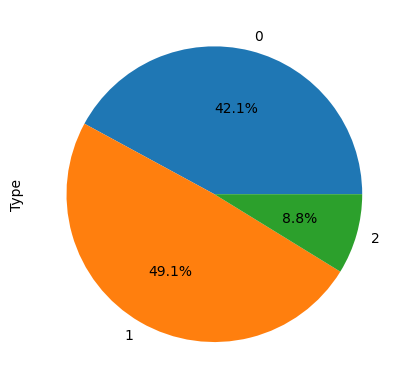

In [ ]:
df_test.groupby('sentiment').size().plot(kind='pie',
                                       y = "sentiment",
                                       label = "Type",
                                       autopct='%1.1f%%')

## Preparing the data for encoding

In [ ]:
X_test = df_test['Text']
y_test = df_test['sentiment']

In [ ]:
## Converting to list for downstream processing
X_test_list=X_test.tolist()

In [ ]:
## load the fine-tuned models from from Twitter Airline Sentiment Dataset
import joblib
model = joblib.load('/content/drive/MyDrive/fine_tuned_roberta_model_TAS_v1.sav')
xg_model = joblib.load('/content/drive/MyDrive/XGboost_TAS_v1.sav')

Mounted at /content/drive


In [ ]:
# Encoding the this test data using fine-tuned sentence transformer model from Twitter Airline Sentiment Dataset
vect_test = model.encode(X_test_list, show_progress_bar = True)

Batches:   0%|          | 0/51 [00:00<?, ?it/s]

## Running the fine-tuned and trained model (sentence transformer model + XGBoost) from Twitter Airline Sentiment Dataset on Apple Dataset

In [ ]:
# Running the fine-tuned and trained model (sentence transformer model + XGBoost) from Twitter Airline Sentiment Dataset on this test data
y_pred = xg_model.predict(vect_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred,digits=4)
print("Confusion Matrix - \n",conf_m)
print("Classification report - \n",report)

Confusion Matrix - 
 [[619  60   7]
 [ 57 726  18]
 [  3  43  97]]
Classification report - 
               precision    recall  f1-score   support

           0     0.9116    0.9023    0.9070       686
           1     0.8758    0.9064    0.8908       801
           2     0.7951    0.6783    0.7321       143

    accuracy                         0.8847      1630
   macro avg     0.8608    0.8290    0.8433      1630
weighted avg     0.8838    0.8847    0.8837      1630

